In [186]:

# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [188]:
face = pd.read_csv('/Users/sahityaraipura/Desktop/Live.csv', encoding="cp1252")
face.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [189]:
cols_to_remove = ['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4']
face = face.drop(columns = cols_to_remove, axis =1)

In [190]:
print(face.shape)
face.head()

(7050, 9)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [191]:
X = face.as_matrix()
print(X.shape)
print(X)


(7050, 9)
[[529 512 262 ...   1   1   0]
 [150   0   0 ...   0   0   0]
 [227 236  57 ...   1   0   0]
 ...
 [  2   0   0 ...   0   0   0]
 [351  12  22 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


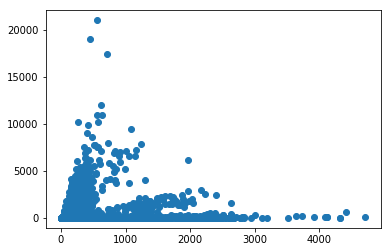

In [192]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [193]:
Z = linkage(X, 'ward')

In [194]:
Z[:20]

array([[  23., 1711.,    0.,    2.],
       [ 414., 1023.,    0.,    2.],
       [1435., 1815.,    0.,    2.],
       [1824., 6699.,    0.,    2.],
       [2291., 2394.,    0.,    2.],
       [1836., 2052.,    0.,    2.],
       [2080., 7055.,    0.,    3.],
       [2370., 7056.,    0.,    4.],
       [2106., 2393.,    0.,    2.],
       [2133., 6961.,    0.,    2.],
       [1884., 1978.,    0.,    2.],
       [1979., 2067.,    0.,    2.],
       [2102., 7061.,    0.,    3.],
       [6199., 6250.,    0.,    2.],
       [1701., 1864.,    0.,    2.],
       [1809., 1960.,    0.,    2.],
       [6171., 6222.,    0.,    2.],
       [  70., 5024.,    0.,    2.],
       [  75., 1814.,    0.,    2.],
       [  79., 1592.,    0.,    2.]])

In [195]:
X[[1836, 2052, 2080]]

array([[38, 10,  0, 38,  0,  0,  0,  0,  0],
       [38, 10,  0, 38,  0,  0,  0,  0,  0],
       [38, 10,  0, 38,  0,  0,  0,  0,  0]])

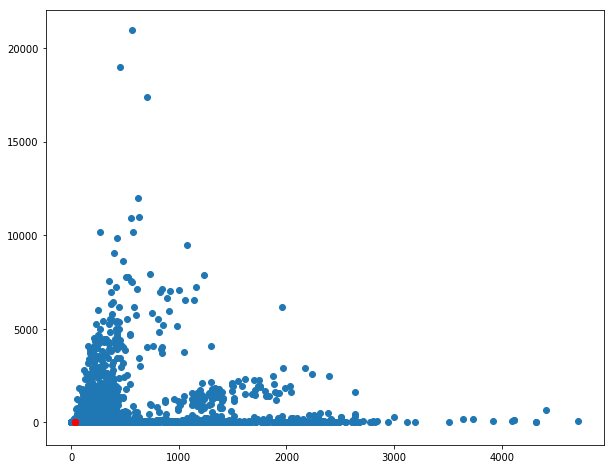

In [196]:
idxs = [1836, 2052, 2080]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

In [197]:
X[[1836, 2052, 2080]]

array([[38, 10,  0, 38,  0,  0,  0,  0,  0],
       [38, 10,  0, 38,  0,  0,  0,  0,  0],
       [38, 10,  0, 38,  0,  0,  0,  0,  0]])

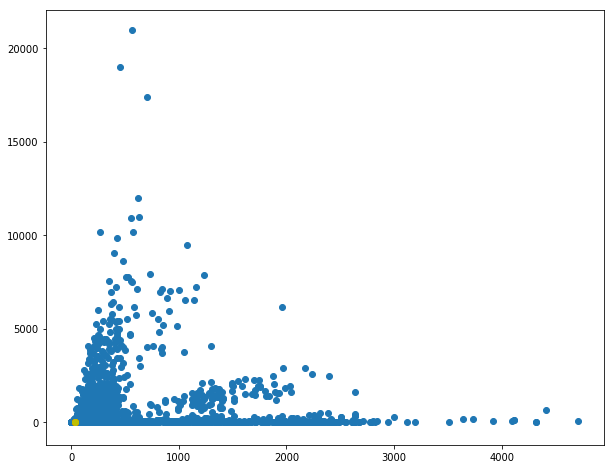

In [198]:
idxs = [1836, 2052, 2080]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = idxs = [1836, 2052, 2080]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

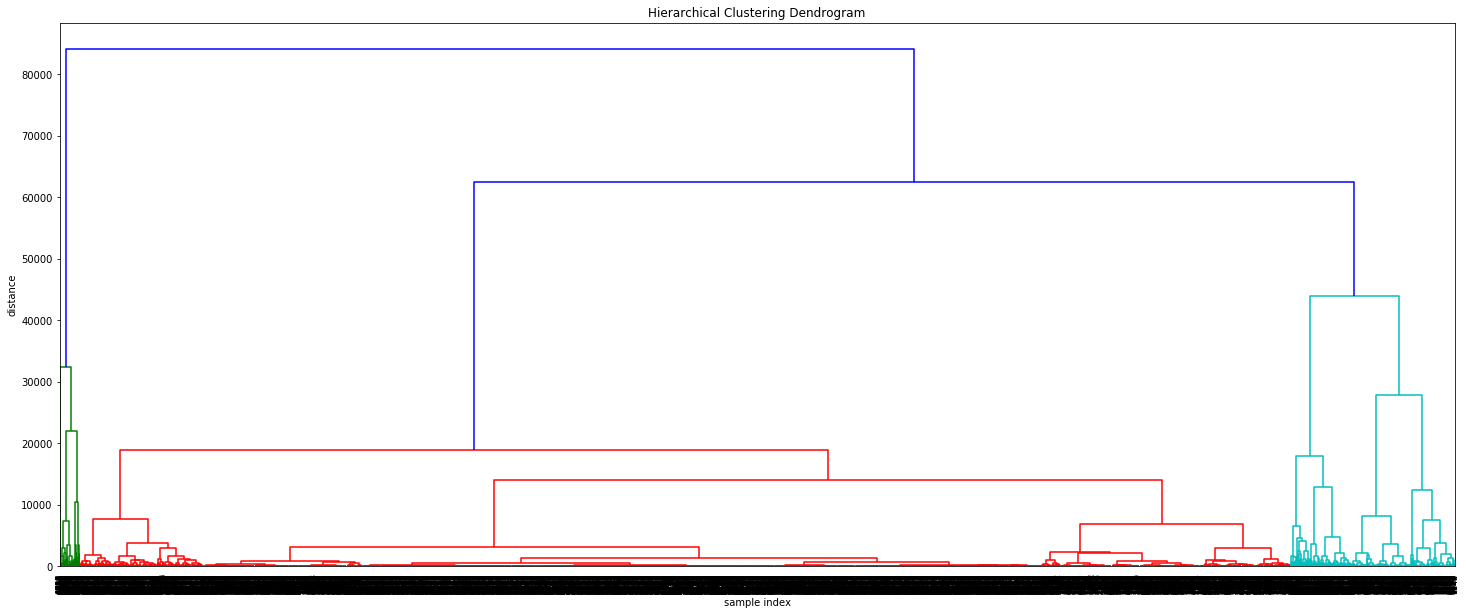

In [199]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

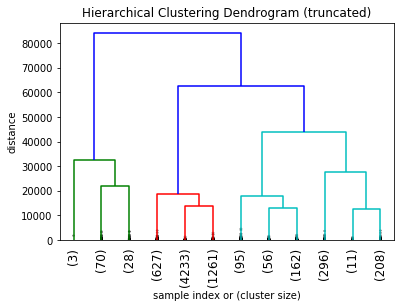

In [200]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

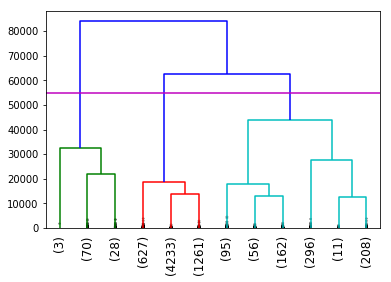

In [218]:
max_d = 55000
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.axhline(y=max_d, c='m')
plt.show()

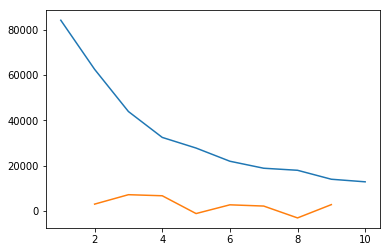

clusters: 3


In [202]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [203]:
from scipy.cluster.hierarchy import fcluster
max_d = 55000
clusters = fcluster(Z, max_d, criterion='distance')
clusters


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [204]:
k=3
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [210]:
def add_clusters_to_frame(or_data, clusters):
    or_frame = pd.DataFrame(data=or_data)
    or_frame_labelled = pd.concat([or_frame, pd.DataFrame(clusters)], axis=1)
    return(or_frame_labelled)

df = add_clusters_to_frame(face, clusters)
df.columns = ['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'cluster']

df.head(113)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,2
1,150,0,0,150,0,0,0,0,0,2
2,227,236,57,204,21,1,1,0,0,2
3,111,0,0,111,0,0,0,0,0,2
4,213,0,0,204,9,0,0,0,0,2
5,217,6,0,211,5,1,0,0,0,2
6,503,614,72,418,70,10,2,0,3,2
7,295,453,53,260,32,1,1,0,1,2
8,203,1,0,198,5,0,0,0,0,2
9,170,9,1,167,3,0,0,0,0,2


In [206]:
#face['num_reactions'].where(face['0'] == 1)
df[df['cluster'] == 1]['num_reactions']
df[df['cluster'] == 1]['num_comments']
df[df['cluster'] == 3]['num_reactions']

92       675
93       737
99      1493
112     1005
128      688
150      648
166     4410
188      629
198      571
208      734
223      618
225      321
243      717
266      783
342      682
343     1379
344      629
355     1186
361     1043
362      690
441      905
445      340
556      641
558      654
694      928
714      921
726     1542
784      775
810      619
913      629
        ... 
6764     303
6785     250
6822     344
6834     278
6837     146
6853     224
6854     193
6867     101
6869     199
6880     104
6884     112
6885      76
6888     114
6892     198
6894     247
6915     205
6919     216
6922     120
6923     106
6924     116
6927     112
6932     159
6935     180
6937     173
6944     178
6947     142
6959     181
6962     127
6995     685
7001     973
Name: num_reactions, Length: 828, dtype: int64

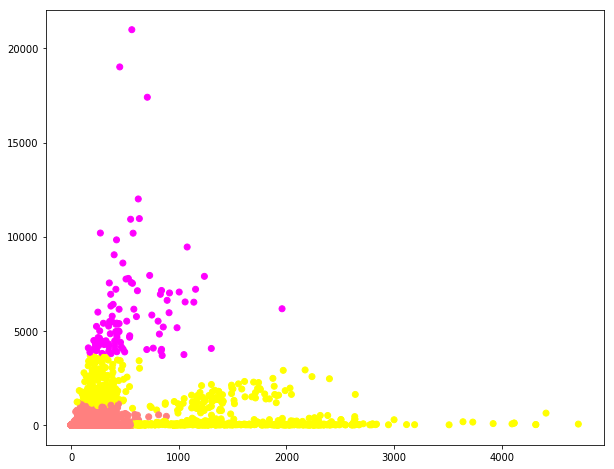

In [217]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='spring')  # plot points with cluster dependent colors
plt.show()

In [208]:
#The data is in cluster 3 if the number of reactions is greater than 600 or the number of comments is between 1000 to 3000
#The data is in cluster 2 if the number of reactions is below 600 and the number of comments is below 1000
#the data is in cluster 1 if the number of comments is greater than 4000

